## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:15px; border-radius:10px; text-align:center;">🚗 **Audi Car Price Prediction**</h3>

<center>
  <img src="Audi Car.png" alt="Audi Used Car Price Prediction" width="550">
</center>

<h2 style="color:#003366;">🎯 Project Objective</h2>

In this project, we aim to build a machine learning model to accurately predict the **`price of Audi cars`** using features such as model, year, mileage, fuel type, and more.

💡 Predicting car prices helps:
- Car buyers make informed decisions.
- Dealerships offer fair, data-driven prices.
- Understand market trends in the automobile industry.


## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:10px; border-radius:10px; text-align:center; font-size:25px;">***Import Libraries***</h3>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:10px; border-radius:10px; text-align:center; font-size:25px;">📂 ***Load Dataset***</h3>

<h2 style="color:#003366;">📋 Dataset Overview</h2>

We load the dataset and check for:
- Dataset shape
- Data types
- Sample rows
- Statistical summary


# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Data Loading and Displaying First Few Rows:***</span>

In [9]:
Audi_data = pd.read_csv("audi.csv")

In [10]:
Audi_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


This dataset contains car listings of Audi cars, including various features such as model, year, engine size, mileage, fuel type, and price. Our goal is to predict the **`price`** of an Audi car based on these features.

## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:10px; border-radius:10px; text-align:center; font-size:25px;">📈 ***Exploratory Data Analysis (EDA)***</h3>

Here, we explore the data with visualizations to:
- Understand distributions
- Identify trends
- Spot outliers
- Correlations between variables


# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Basic information about dataset:***</span>

### <u/>**`Shape of the dataset`**</u>

In [16]:
print(f"Dataset contains {Audi_data.shape[0]} rows and {Audi_data.shape[1]} columns")

Dataset contains 10668 rows and 9 columns


### <u>**`Data types and missing values`**<u/>

In [18]:
Audi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


- No nulls detected, data types are clean — this dataset is well-structured.

### <u>**`Missing values`**<u/>

In [21]:
Audi_data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

- Dataset is clean — there are no null values present in data set

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Data Cleaning:***</span>

### <u>**`Handling Zero Values`**<u/>

In [25]:
Audi_data["engineSize"] = Audi_data["engineSize"].replace(0,np.nan)
Audi_data["tax"] = Audi_data["tax"].replace(0,np.nan)

In [26]:
Audi_data.isna().sum()

model             0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax             536
mpg               0
engineSize       57
dtype: int64

In [27]:
Audi_data = Audi_data.dropna()

### <u>**`Drop columns`**<u/>

In [29]:
Final_Audi = Audi_data.drop(['model', 'tax', 'mileage'], axis=1)

 - Replacing zero values with NaN and then dropping them ensures that the dataset remains accurate and free from misleading data points.

### <u>**`Removing Duplicates`**<u/>

In [32]:
Final_Audi.drop_duplicates(inplace = True)

In [33]:
print("Before:", len(Audi_data))
Audi_data.dropna(inplace=True)
print("After:", len(Audi_data))


Before: 10075
After: 10075


### <u>**`Unique values`**<u/>

In [35]:
print("Unique models:", Audi_data['model'].nunique())
print("Unique transmission:", Audi_data['transmission'].unique())
print("Unique fuel types:", Audi_data['fuelType'].unique())

Unique models: 26
Unique transmission: ['Manual' 'Automatic' 'Semi-Auto']
Unique fuel types: ['Petrol' 'Diesel' 'Hybrid']


# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Statistical Summary:***</span>

In [37]:
Audi_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10075.0,2017.174789,2.174335,1997.0,2016.0,2017.0,2019.0,2020.0
price,10075.0,23480.728337,11674.774635,1490.0,15995.0,20956.0,28422.5,145000.0
mileage,10075.0,23979.084963,23193.314150,1.0,5573.0,17713.0,35127.5,323000.0
tax,10075.0,132.612407,62.315554,20.0,145.0,145.0,145.0,580.0
mpg,10075.0,49.419027,10.974784,18.9,40.9,49.6,56.5,156.9
engineSize,10075.0,1.965042,0.588302,1.0,1.5,2.0,2.0,6.3


- After replacing invalid zeroes and dropping rows with missing values, we are left with **`10,075`** clean records.
- The data now contains realistic and consistent ranges for all features. The engineSize, tax, and mpg columns no longer contain 0s. 
- The **`maximum price (145,000)`** reflects rare high-end Audi models, while the mileage varies from nearly new (1 mile) to older cars (323,000 miles). 
- The data is now ready for further analysis and modeling.

## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:10px; border-radius:10px; text-align:center; font-size:25px;">📊 ***Data Visualization***</h3>

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Pairplot for Numerical Features:***</span>

- Below we visualize the distribution of key numerical features such as year, price, mileage, tax, mpg, and engine size.
- Each histogram includes a KDE curve to show data density and a legend with skewness and kurtosis values, helping assess the shape of each distribution.

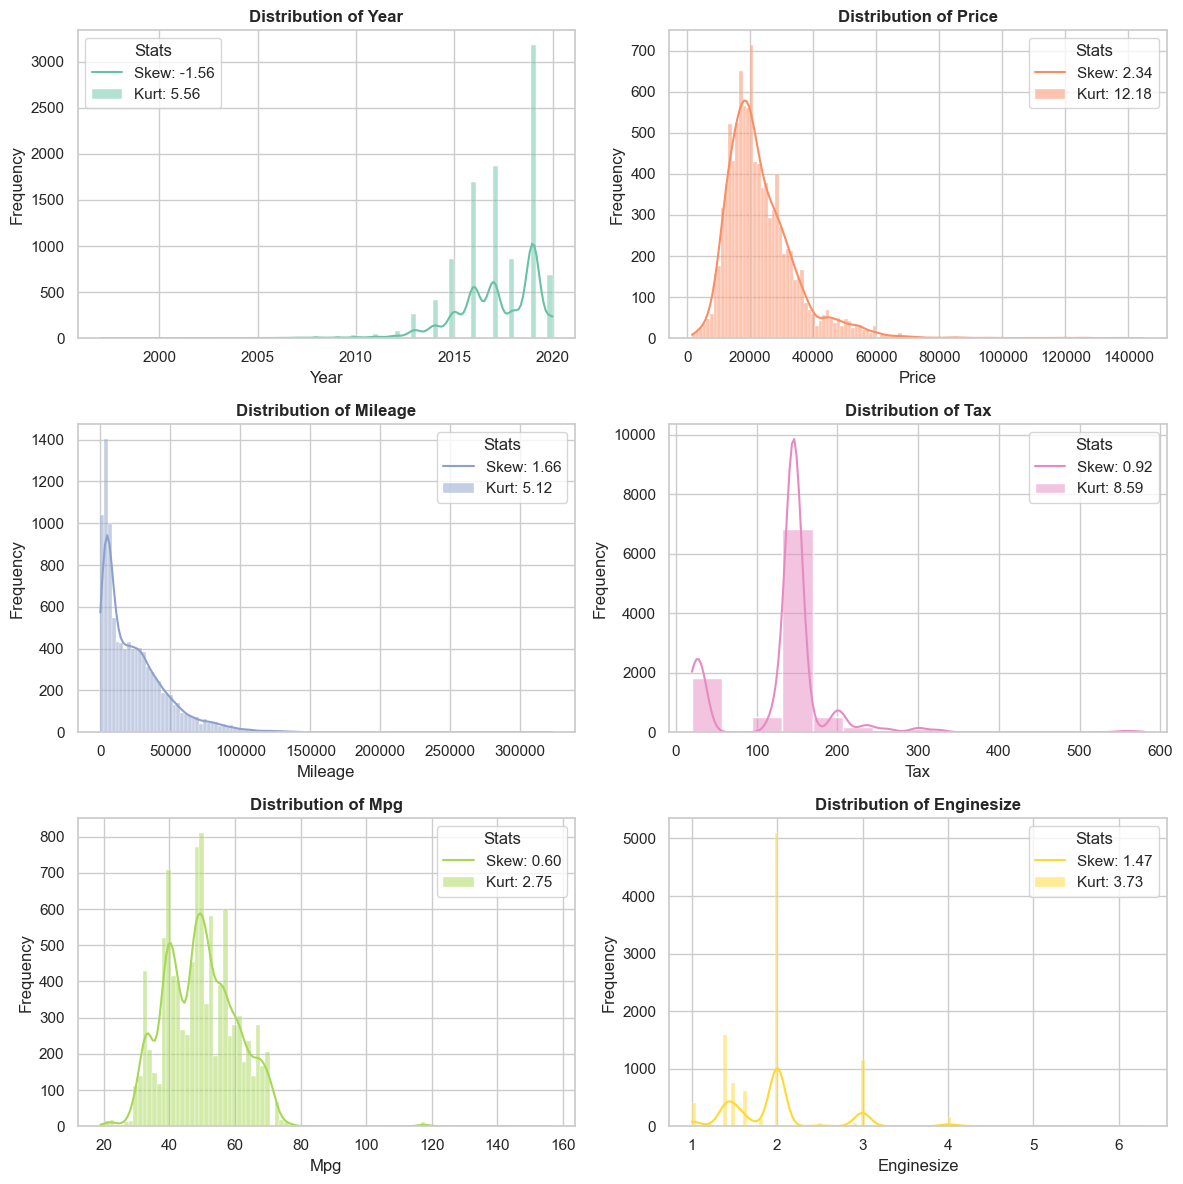

In [42]:
sns.set(style="whitegrid")                            # a clean background style
fig, axes = plt.subplots(3, 2, figsize=(12, 12))      # Set up the figure and axes

numerical_features = ["year", "price", "mileage", "tax", "mpg", "engineSize"]          # Numerical features
colors = sns.color_palette("Set2", len(numerical_features))                            # Assign unique colors

# Loop to plot each histogram with KDE and stats
for ax, feature, color in zip(axes.flatten(), numerical_features, colors):
    sns.histplot(Audi_data[feature], kde=True, color=color, ax=ax)
    ax.set_title(f'Distribution of {feature.capitalize()}', fontsize=12, weight='bold')
    ax.set(xlabel=feature.capitalize(), ylabel='Frequency')
    ax.legend([f"Skew: {Audi_data[feature].skew():.2f}", 
               f"Kurt: {Audi_data[feature].kurt():.2f}"], title="Stats")

plt.tight_layout()
plt.show()


- Most features like price, mileage, and engineSize are right-skewed, meaning they have many low values and a few high outliers.

- Year is left-skewed, with most cars from recent years.

- High kurtosis in price and tax suggests presence of outliers.

- MPG is nearly symmetric, showing balanced fuel efficiency.

- Skewed features may benefit from log transformation to improve model accuracy.


### 💹 Price Distribution

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Mileage vs. Price:***</span>

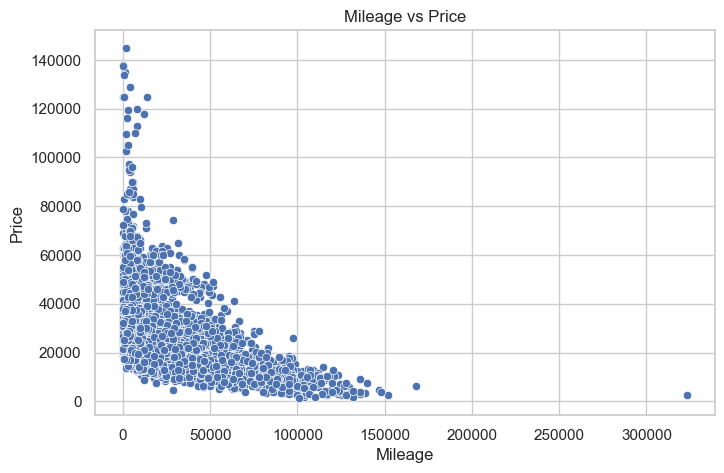

In [46]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'mileage', y = 'price', data = Audi_data)
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

 - Higher mileage leads to lower price. There's a clear **`negative correlation`**, making mileage an important factor in price prediction.

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Scatterplot: Transmission vs Price:***</span>

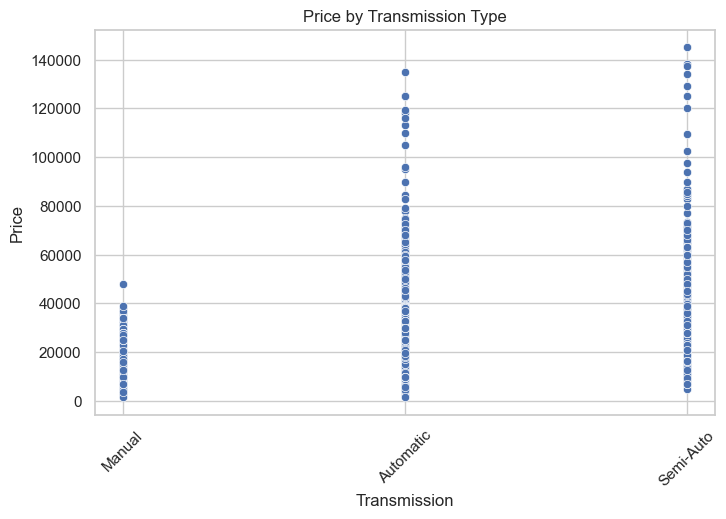

In [49]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'transmission', y = 'price', data = Audi_data)
plt.title("Price by Transmission Type")
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

 - Automatic and Semi-Auto cars have higher prices than Manual ones. Transmission type impacts price, with manual cars generally being cheaper.

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Fuel Type Dstribution:***</span>

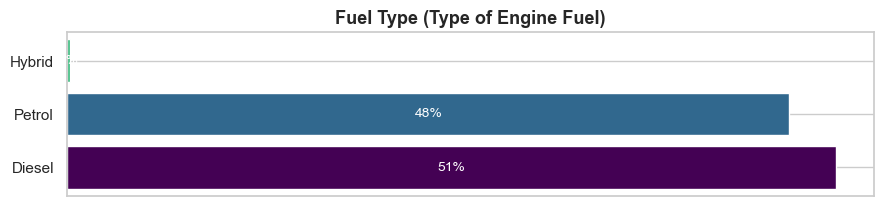

In [52]:
counts = Audi_data['fuelType'].value_counts()
percent = (counts / counts.sum() * 100).round().astype(int)
colors = [cm.viridis(i / len(counts)) for i in range(len(counts))]

fig, ax = plt.subplots(figsize=(9, 2))
bars = ax.barh(range(len(counts)), counts, color=colors)
ax.bar_label(bars, labels=[f'{p}%' for p in percent], label_type='center', color='white', fontsize=10)

ax.set_yticks(range(len(counts)))
ax.set_yticklabels(counts.index)
ax.set_xticks([])

plt.tight_layout()
plt.title('Fuel Type (Type of Engine Fuel)', fontsize=13, weight='bold')
plt.show()

 - **`Diesel (51%)`** is the most common fuel type, slightly ahead of Petrol (48%); Hybrid is rare.

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Model Distribution:***</span>

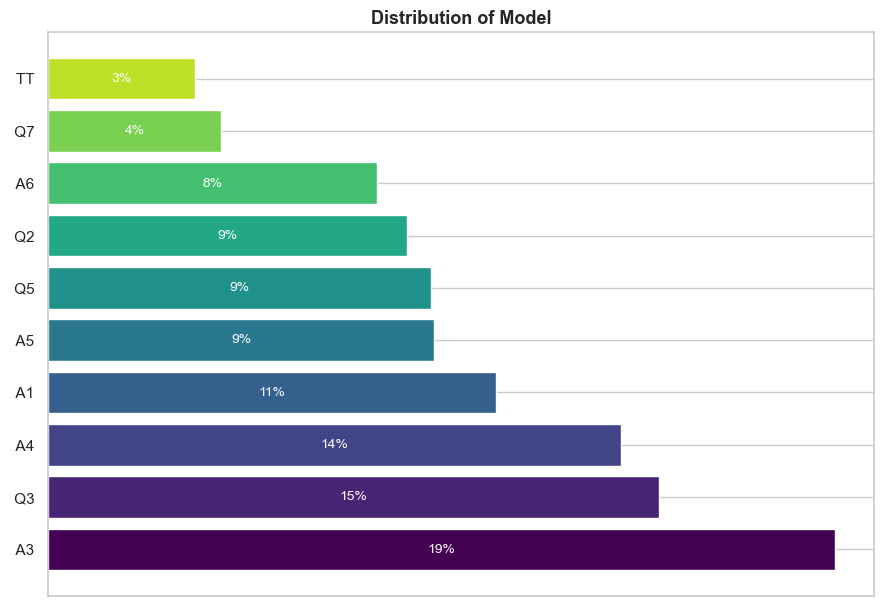

In [55]:
counts = Audi_data['model'].value_counts().head(10)
percent = (counts / counts.sum() * 100).round().astype(int)
colors = [cm.viridis(i / len(counts)) for i in range(len(counts))]

fig, ax = plt.subplots(figsize=(9, 6))
bars = ax.barh(range(len(counts)), counts, color=colors)
ax.bar_label(bars, labels=[f'{p}%' for p in percent], label_type='center', color='white', fontsize=10)

ax.set_yticks(range(len(counts)))
ax.set_yticklabels(counts.index)
ax.set_xticks([])

plt.tight_layout()
plt.title('Distribution of Model', fontsize=13, weight='bold')
plt.show()

- **`A3`** is the most listed Audi model **(19%)**, followed by Q3 (15%). Models like TT and Q7 have the fewest listings (4%).

# <span style="background: black; color:white; padding: 5px; font-size:15px;"> 🧱 ***Correlation Heatmap:***</span>

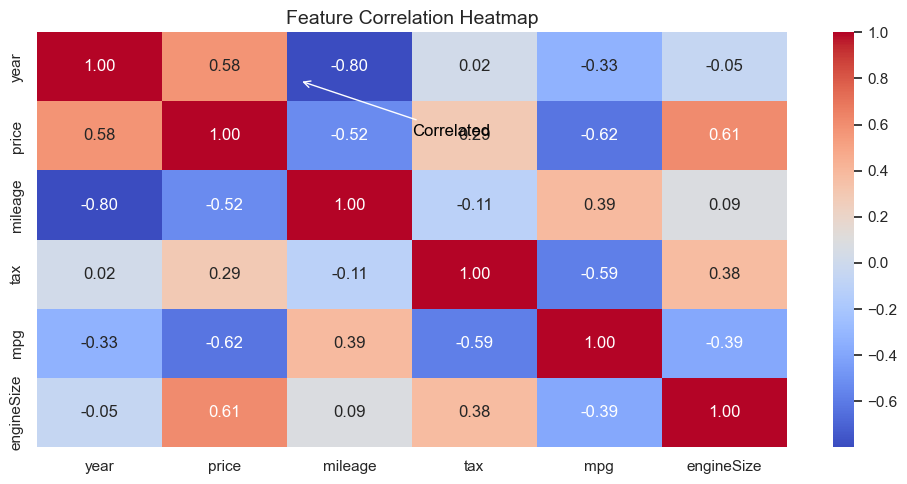

In [58]:
plt.figure(figsize=(10, 5))

ax = sns.heatmap(Audi_data.corr(), 
                 annot=True,          # Show values inside the boxes
                 cmap='coolwarm',     # Color scheme
                 fmt=".2f")           # Format the numbers to 2 decimal places

ax.annotate('Correlated', 
            xy=(2.1, 0.7),            # Point to (x=2.1, y=0.7)
            xytext=(3, 1.5),          # Text position
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=12, color='black')

plt.title('Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

- Year and Mileage show a strong negative correlation (-0.80): newer cars tend to have lower mileage.

- Price is positively correlated with Engine Size (0.61) and Year (0.58), meaning newer cars and those with bigger engines are usually priced higher.

- Mileage is negatively correlated with Price (-0.52): higher mileage usually lowers the car's value.

## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:10px; border-radius:10px; text-align:center; font-size:25px;">⚙️ ***Data Processing***</h3>

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Encoding Categorical Variables:***</span>

### <u>**`Convert categorical variables into dummy/indicator variables:`**<u/>

- We apply one-hot encoding using `pd.get_dummies()` to convert categorical features into numerical values for model compatibility.

In [64]:
Audi_processed = pd.get_dummies(Audi_data, columns = ['model', 'transmission', 'fuelType'], drop_first = True)

In [65]:
Audi_processed.sample(5)

,year,price,mileage,tax,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
2285,2017,18995,9538,150.0,56.5,1.4,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1426,2016,18698,30319,145.0,51.4,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4727,2016,15681,33291,30.0,70.6,1.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5455,2018,27777,13199,145.0,55.4,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1656,2017,27990,22631,145.0,50.4,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <u>**`Feature Scaling:`**<u/>

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [68]:
features_to_scale = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Audi_processed[features_to_scale] = scaler.fit_transform(Audi_processed[features_to_scale]) 

### <u>**`Splitting Data into Training and Testing Sets`**<u/>

In [70]:
X = Audi_processed.drop('price', axis = 1)
Y = Audi_processed['price']

### <u>**`Perform train-test splite (80% training, 20% testing)`**<u/>

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [73]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 8060 samples
Testing set: 2015 samples


## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:10px; border-radius:10px; text-align:center; font-size:25px;">👩‍💻 ***Model Implementation***</h3>

<h2 style="color:#003366;">🧠 Model Building & Evaluation</h2>

We train multiple models and evaluate their performance:
- Linear Regression
- Random Forest
- Decision Tree
- Gradient Boosting Regressor
- K-Nearest Neighbors (KNN)
- XGBoost Regressor

# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Import machine learning models and evaluation matrics:***</span>

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Defaulting to user installation because normal site-packages is not writeable


### <u>**`Linear Regression:`**<u/>

In [79]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
y_pred_lr = lr_model.predict(X_test)

In [80]:
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(Y_test, y_pred_lr)

In [81]:
print("Linear Regression: ")
print(f"MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R2: {r2_lr:.2f}\n")

Linear Regression: 
MAE: 2595.59, RMSE: 4037.30, R2: 0.88



### <u>**`Random Forest Regressor:`**<u/>

In [83]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

In [84]:
mae_rf = mean_absolute_error(Y_test, y_pred_rf)
mse_rf = mean_squared_error(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

In [85]:
print("Random Forest Regressor")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}\n")

Random Forest Regressor
MAE: 1526.72, RMSE: 2205.69, R2: 0.97



### <u>**`Decision Tree Regressor:`**<u/>

In [87]:
dt_model = DecisionTreeRegressor(random_state = 42)
dt_model.fit(X_train, Y_train)
y_pred_dt = dt_model.predict(X_test)

In [88]:
mae_dt = mean_absolute_error(Y_test, y_pred_dt)
mse_dt = mean_squared_error(Y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(Y_test, y_pred_dt)

In [89]:
print("Decision Tree Regressor: ")
print(f"MAE: {mae_dt:.2f}, RMSE: {rmse_dt:.2f}, R2: {r2_dt:.2f}\n")

Decision Tree Regressor: 
MAE: 2028.93, RMSE: 3676.37, R2: 0.90



### <u>**`Gradient Boosting Regressor:`**<u/>

In [91]:
gb_model = GradientBoostingRegressor(random_state = 42)
gb_model.fit(X_train, Y_train)
y_pred_gb = gb_model.predict(X_test)

In [92]:
mae_gb = mean_absolute_error(Y_test, y_pred_gb)
mse_gb = mean_squared_error(Y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(Y_test, y_pred_gb)

In [93]:
print("Gradient Boosting Regressor: ")
print(f"MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}, R2: {r2_gb:.2f}\n")

Gradient Boosting Regressor: 
MAE: 2093.44, RMSE: 2937.84, R2: 0.94



### <u>**`K - Nearest Neighbors Regressor:`**<u/>

In [95]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, Y_train)
y_pred_knn = knn_model.predict(X_test)

In [96]:
mae_knn = mean_absolute_error(Y_test, y_pred_knn)
mse_knn = mean_squared_error(Y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(Y_test, y_pred_knn)

In [97]:
print("K-Nearest Neighbors Regressor:")
print(f"MAE: {mae_knn:.2f}, RMSE: {rmse_knn:.2f}, R2: {r2_knn:.2f}\n")

K-Nearest Neighbors Regressor:
MAE: 1729.95, RMSE: 2637.53, R2: 0.95



### <u>**`XGBoost:`**<u/>

In [99]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [100]:
mae_xgb = mean_absolute_error(Y_test, y_pred_xgb)
mse_xgb = mean_squared_error(Y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(Y_test, y_pred_xgb)

In [101]:
print("XGBoost Regressor:")
print(f"MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R2: {r2_xgb:.2f}\n")

XGBoost Regressor:
MAE: 1521.83, RMSE: 2213.53, R2: 0.96



# <span style="background: black; color:white; padding: 5px; font-size:15px;">***Model Evaluation and Comparison:***</span>

### <u/>**`Compare the models bassed on a chosen mertic(here,R^2):`**</u>

- Collect metrics for all 6 models

In [105]:
performance = {
    'Linear Regression': {
        'MAE': mae_lr,
        'RMSE': rmse_lr,
        'R2 Score': r2_lr
    },
    'Random Forest': {
        'MAE': mae_rf,
        'RMSE': rmse_rf,
        'R2 Score': r2_rf
    },
    'XGBoost': {
        'MAE': mae_xgb,
        'RMSE': rmse_xgb,
        'R2 Score': r2_xgb
    },
    'K-Nearest Neighbors': {
        'MAE': mae_knn,
        'RMSE': rmse_knn,
        'R2 Score': r2_knn
    },
    'Decision Tree': {
        'MAE': mae_dt,
        'RMSE': rmse_dt,
        'R2 Score': r2_dt
    },
    'Gradient Boosting': {
        'MAE': mae_gb,
        'RMSE': rmse_gb,
        'R2 Score': r2_gb
    }
}

### <u/>**`Convert to DataFrame`**</u>

In [107]:
results_df = pd.DataFrame.from_dict(performance, orient='index').reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

### <u/>**`Sort by R2 Score (best model on top)`**</u>

In [109]:
results_df = results_df.sort_values(by='R2 Score', ascending=False)
display(results_df)

,Model,MAE,RMSE,R2 Score
1,Random Forest,1526.720442,2205.692809,0.965208
2,XGBoost,1521.834205,2213.529574,0.964960
3,K-Nearest Neighbors,1729.954640,2637.527114,0.950250
5,Gradient Boosting,2093.435548,2937.839462,0.938276
4,Decision Tree,2028.925738,3676.371300,0.903343
0,Linear Regression,2595.587332,4037.303172,0.883432


- The Random Forest Regressor performed best with an R² score of **97%**.
- This model can help car dealers or customers estimate a fair price based on features like year, mileage, and fuel type.
- The model shows promising results and generalizes well on unseen data.

- **`Random Forest`** and **`XGBoost`** performed the best with the <u/>**lowest errors**</u> and <u/>**highest R² scores**</u>. Linear Regression had the weakest performance.

### <u/>**`Best Model`**</u>

In [113]:
best_model = results_df.loc[results_df['R2 Score'].idxmax()]
print(f"Best Model: {best_model['Model']} (R² Score = {best_model['R2 Score']:.2f})")

Best Model: Random Forest (R² Score = 0.97)


<u/>**`Random Forest`**</u> is the best model with the highest R² Score of <u/>0.97</u>, indicating excellent prediction accuracy.

## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:10px; border-radius:10px; text-align:center; font-size:25px;">💾 ***Saving Best Model (Pickle)***</h3>

- We save the trained model and scaler using `pickle` for future use without retraining.


In [117]:
import pickle

In [118]:
pickle.dump(rf_model, open("Best_model_Audi_RF.pkl", "wb"))
pickle.dump(X.columns.tolist(), open("Audi_feature_columns.pkl", "wb"))

### <u/>**`Model Testing with Dummy`**</u>

To ensure our model works after saving, we load it with `pickle`, apply the same scaler, and run a test prediction using dummy values.

This step verifies:
- 🔄 Model persistence
- 🔍 Scaler + feature pipeline consistency
- 🎯 Real-world usability with unseen data



### <u>**`Load saved model`**<u/>

In [122]:
model = pickle.load(open("Best_model_Audi_RF.pkl", "rb"))
features = pickle.load(open("Audi_feature_columns.pkl", "rb"))

### <u>**`Example dummy input`**<u/>

In [124]:
dummy_input = pd.DataFrame([[2018, 20000, 145, 55.4, 2.0] + [0]*(len(features)-5)],
                           columns=features)

### <u>**`Predict`**<u/>

In [126]:
predicted_price = model.predict(dummy_input)
print("Predicted Price:", predicted_price[0])

Predicted Price: 26969.86


💡 <u>**`Result:`**<u/>  

- The trained Random Forest Regression model predicted a car price of approximately 26,969.86 for the input features. This shows that the model can handle new data and deliver realistic price estimations.
- This confirms the model is working as intended and is ready for real-time predictions or integration into a pricing system.


## <a id='1'></a><center> <h3 style="background-color:#e6f0ff; color:#003366; padding:10px; border-radius:10px; text-align:center; font-size:25px;">🏁 ***Final Conclusion***</h3>

📌 In this project, we successfully built a machine learning model to predict Audi car prices based on features like mileage, year, tax, and fuel type.

- After preprocessing and exploratory data analysis, we trained multiple regression models on a cleaned Audi car dataset.
- Among them, the **`Random Forest Regressor`** achieved the best performance with an **`R² score of 97%`**, indicating excellent accuracy in predicting car prices.
- One-hot encoding was applied for categorical variables, and the best model was saved using pickle for future use.
- A dummy prediction was tested successfully, returning a price of **`26,969.86`**, showing the model is ready for real-world use.
- This model can effectively assist car dealers or buyers in estimating fair market prices for Audi vehicles.